In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Analyze sentiment using TextBlob
def analyze_sentiment(lyrics):
    try:
        blob = TextBlob(lyrics)  # Analyze text
        return blob.sentiment.polarity  # Get polarity score range -1 
    except Exception as e:
        print(f"Error analyzing sentiment: {e}")
        return none
        
# Categorizes sentiment into Pos, Neg, and Neutral 
def categorize_sentiment (lyrics):
    if analyze_sentiment (lyrics) > 0:
        return "Positive"
    elif analyze_sentiment (lyrics) < 0:
        return "Negative"
    else:
        return "Neutral"

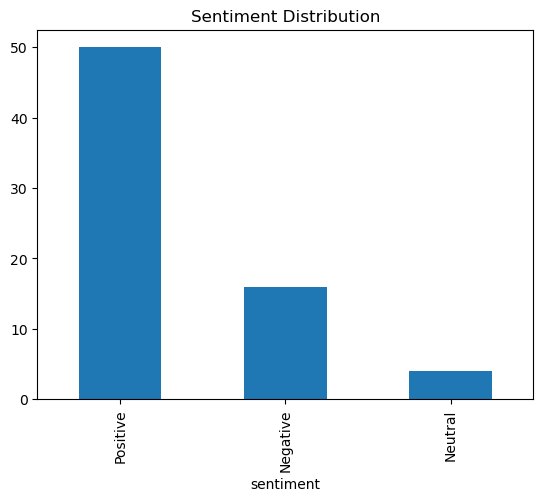

In [3]:
# Read in song data file
lyrics_df = pd.read_csv('lyrics_df.csv')

# Plot sentiment distribution
lyrics_df['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.show()

Shows the seniment distribution across the lyrics dataframe. There is approximately 17.5 instances of a positive sentiment and only approximately 2.5 instances of a negative sentiment. The distribution is clearly skewed toward positive sentiments. This may end up effecting our analysis as the data isn't evenly distrubuted across the two types of sentiments.

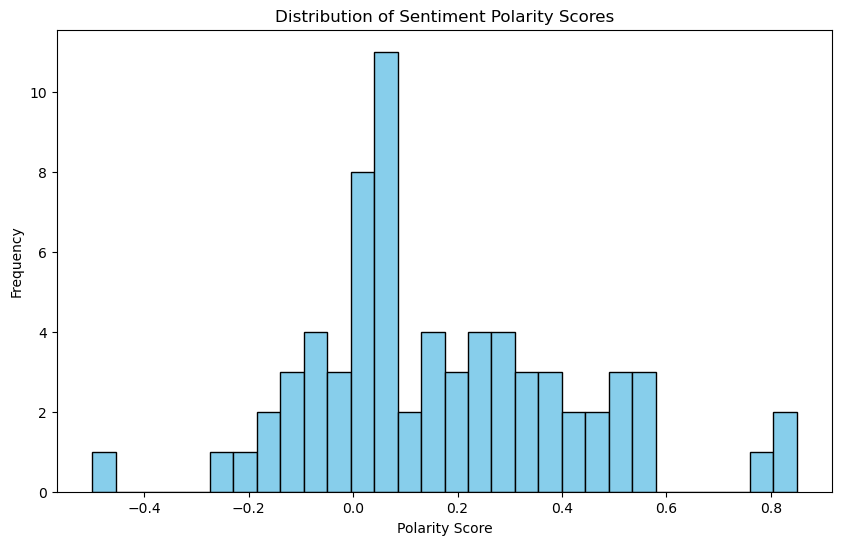

In [5]:
# Compute polarity scores and add them to a new column in the DataFrame
lyrics_df['polarity'] = lyrics_df['lyrics'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plotting the distribution of polarity scores
plt.figure(figsize=(10, 6))
plt.hist(lyrics_df['polarity'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Polarity Scores')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()

Shows the average sentiment distribution across the lyrics dataframe, based on views. Content with a negative sentiment has an average of around 300 million views while content with a positive sentiment had around 600 million views. Overall, songs that have a positive sentiment have significantly more views that songs that have a negative sentiment.

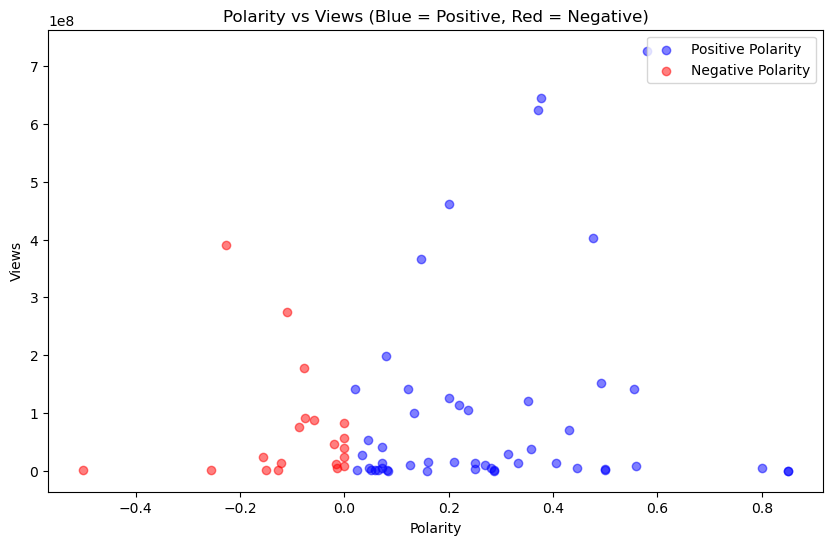

In [7]:
plt.figure(figsize=(10, 6))

# Separate the data based on polarity
positive_polarity = lyrics_df[lyrics_df['polarity'] > 0]
negative_polarity = lyrics_df[lyrics_df['polarity'] <= 0]

# Plot positive polarity in blue
plt.scatter(positive_polarity['polarity'], positive_polarity['views'], color='blue', alpha=0.5, label='Positive Polarity')

# Plot negative polarity in red
plt.scatter(negative_polarity['polarity'], negative_polarity['views'], color='red', alpha=0.5, label='Negative Polarity')

plt.xlabel('Polarity')
plt.ylabel('Views')
plt.title('Polarity vs Views (Blue = Positive, Red = Negative)')
plt.legend()

plt.show()

There is no clear correlation between sentiment and views. Some content with neutral sentiment had very high views, while some with higher sentiment had fewer views. Most of the data points with lower views are spread across different sentiment scores, while the highest-viewed content clusters around a neutral sentiment score. 

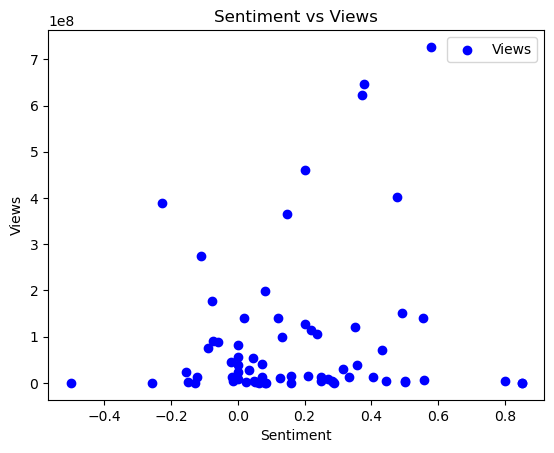

In [9]:
# Scatter plot for views vs sentiment

plt.scatter(lyrics_df['lyrics'].apply(analyze_sentiment), lyrics_df['views'], color='blue', label='Views')


# Plot the trend line
plt.xlabel('Sentiment')
plt.ylabel('Views')
plt.title('Sentiment vs Views')
plt.legend()


plt.show()

There is no clear correlation between sentiment and views. Some content with neutral sentiment had very high views, while some with higher sentiment had fewer views. Most of the data points with lower views are spread across different sentiment scores, while the highest-viewed content clusters around a neutral sentiment score. 

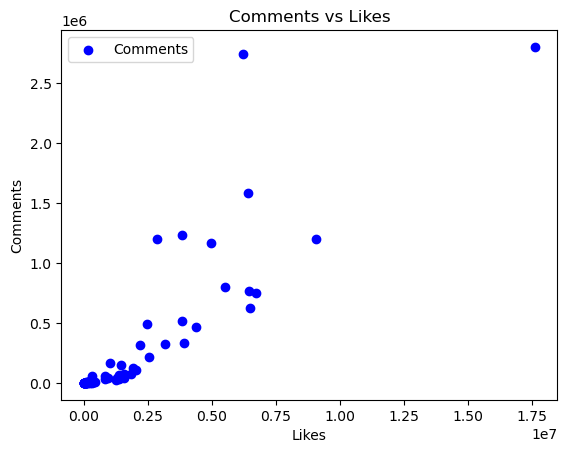

In [11]:
#Scatter plot for Comments vs Likes
plt.scatter(lyrics_df['likes'], lyrics_df['comments'], color='blue', label='Comments')


# Plot the trend line
plt.xlabel('Likes')
plt.ylabel('Comments')
plt.title('Comments vs Likes')
plt.legend()


plt.show()

The graph shows that there is a positive correlation between amount of likes and amount of comments. However, the higher the variables, the more spread out. This is not surprising as it's hard for songs to preform well, becasue there are so many of them. Also, it makes sense that more comments has a correlation with more likes. This is becasue when a song is popular, there are going to be more views, and therefore more likes and comments. 

## ML Plan:
First Model (Manual - NumPy):
For our first machine learning model, we will implement a Linear Regression manually using NumPy. This model will help us predict a song’s popularity based on its lyrical sentiment polarity score. We hypothesize that songs with more positive lyrics or more English lyrics will have higher popularity scores.

Second Model (Scikit-learn):
For our second model, we will implement a Logarithmic Regression using scikit-learn to compare its performance against the linear model. We anticipate that a logarithmic transformation may better capture diminishing returns on popularity metrics for songs with extremely high or low sentiment scores.

Additional Analysis - Clustering:
In addition to regression models, we will explore clustering techniques to group songs by similar lyrical themes or emotional tones. This unsupervised learning approach will help identify hidden patterns in the data that may not be immediately apparent.

6280763466496461.0
0.020703287396929282


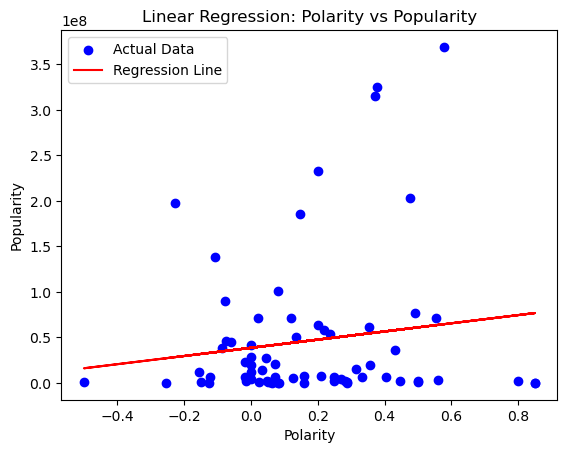

In [14]:
# Linear Regression using NumPy
# Popularity as a weighted sum
lyrics_df['popularity'] = (0.5 * lyrics_df['views'] + 0.3 * lyrics_df['likes'] + 0.2 * lyrics_df['comments'])

# Define features and target for linear regression
X = lyrics_df['polarity'].values
y = lyrics_df['popularity'].values

# Adds a bias column as the first column 
Xnew = np.column_stack([np.ones(X.shape[0]), X])

# Calculates coefficients for the line of best fit
XtX = np.matmul(Xnew.T, Xnew)
inv_XtX = np.linalg.inv(XtX)
line_of_best_fit = np.matmul(inv_XtX, np.matmul(Xnew.T, y))

# Finds all predicted popularity values
ypred = np.matmul(Xnew, line_of_best_fit)

# Finds all residuals based on differences between the predicted and actual popularity values
residuals = y - np.matmul(Xnew, line_of_best_fit)

# Mean squared error based on residuals
mse = (residuals**2).mean()

# R^2 based on mean squared error
r2 = 1 - (mse/y.var())

print(mse)
print(r2)

# Scatter plot
plt.scatter(X, y, color='blue', label='Actual Data')

# Regression line
plt.plot(X, ypred, color='red', label='Regression Line')

# Lables and title
plt.xlabel('Polarity')
plt.ylabel('Popularity')
plt.title('Linear Regression: Polarity vs Popularity')
plt.legend()

plt.show()


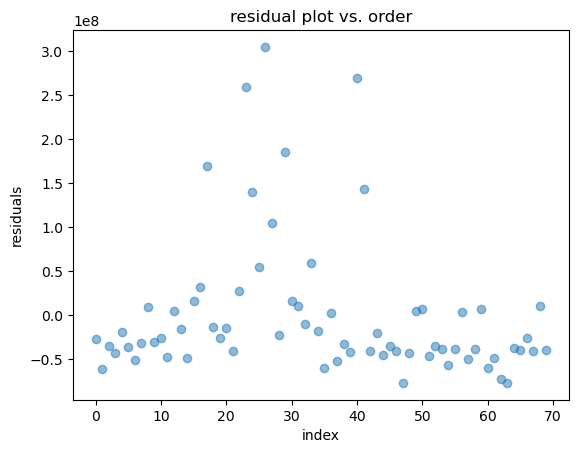

In [15]:
# residuals vs. index plot
plt.scatter(x=range(len(residuals)), y=residuals, alpha=0.5)
plt.xlabel('index')
plt.ylabel('residuals')
plt.title("residual plot vs. order")
plt.show()

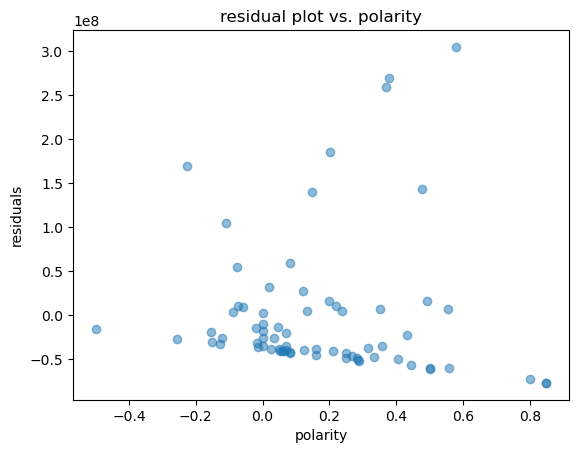

In [16]:
# checking for independence, linearity
plt.scatter(x=lyrics_df['polarity'], y=residuals, alpha=0.5)
plt.xlabel('polarity')
plt.ylabel('residuals')
plt.title("residual plot vs. polarity")
plt.show()

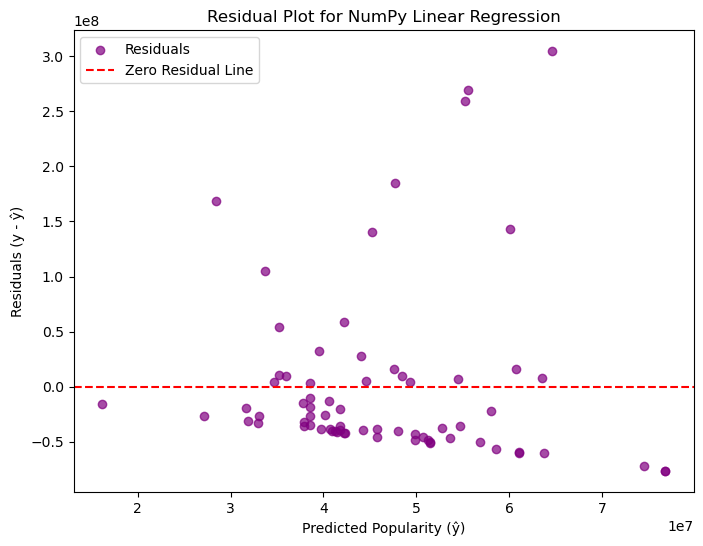

In [17]:
# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(ypred, residuals, alpha=0.7, color='purple', label="Residuals")
plt.axhline(y=0, color='red', linestyle='--', label="Zero Residual Line")
plt.xlabel("Predicted Popularity (ŷ)")
plt.ylabel("Residuals (y - ŷ)")
plt.title("Residual Plot for NumPy Linear Regression")
plt.legend()
plt.show()


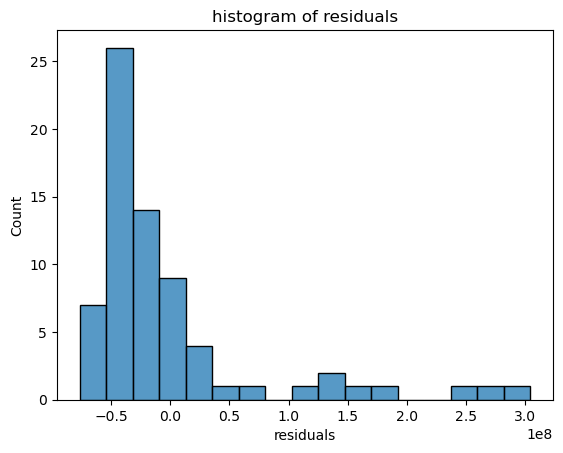

In [18]:
# histogram of residuals, checking normality
sns.histplot(residuals, kde=False)
plt.xlabel("residuals")
plt.title("histogram of residuals")
plt.show()

Mean Squared Error: 6027869951187205.0
R^2 Score: 0.06013444723952999


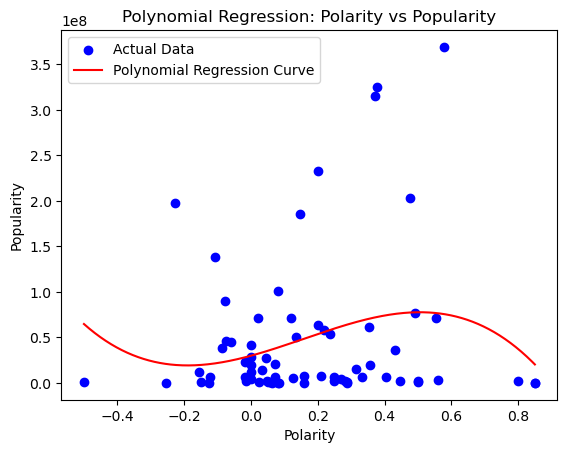

In [19]:
# Define features and target for regression
X = lyrics_df[['polarity']].values
y = lyrics_df['popularity'].values

# create polynomial features - degree 3
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit linear regression model to polynomial features
model = LinearRegression()
model.fit(X_poly, y)

# Predict popularity values
ypred = model.predict(X_poly)

# calc residuals and r^2
mse = mean_squared_error(y, ypred)
r2 = r2_score(y, ypred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plot data points and polynomial regression curve
plt.scatter(X, y, color='blue', label='Actual Data')

# Plot the regression curve
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)

plt.plot(X_range, y_range_pred, color='red', label='Polynomial Regression Curve')

# Add labels 
plt.xlabel('Polarity')
plt.ylabel('Popularity')
plt.title('Polynomial Regression: Polarity vs Popularity')
plt.legend()

plt.show()


This image displays the results of a Polynomial Regression (Degree 3) model. The model achieved an R-squared value of 0.06013, indicating polarity explains 6.1 percent all the variance in popularity scores. The Mean Squared Error (MSE) is relatively high at 6027869951187205.0, suggesting the model does not predict well. The Model Coefficients and Intercept represent the polynomial terms used in the regression equation. However this model does do a better job at explaining the variation between polarity and popularity than the linear regression model.

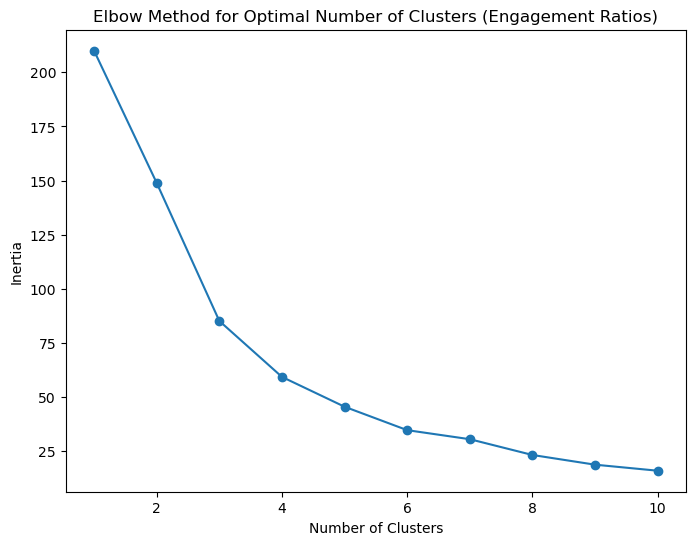

                     likes_per_view  comments_per_view    popularity
popularity_profile                                                  
High Engagement            0.020774           0.000844  1.798264e+07
Low Engagement             0.016376           0.003245  2.458088e+08
Moderate Engagement        0.059040           0.004627  2.663037e+07


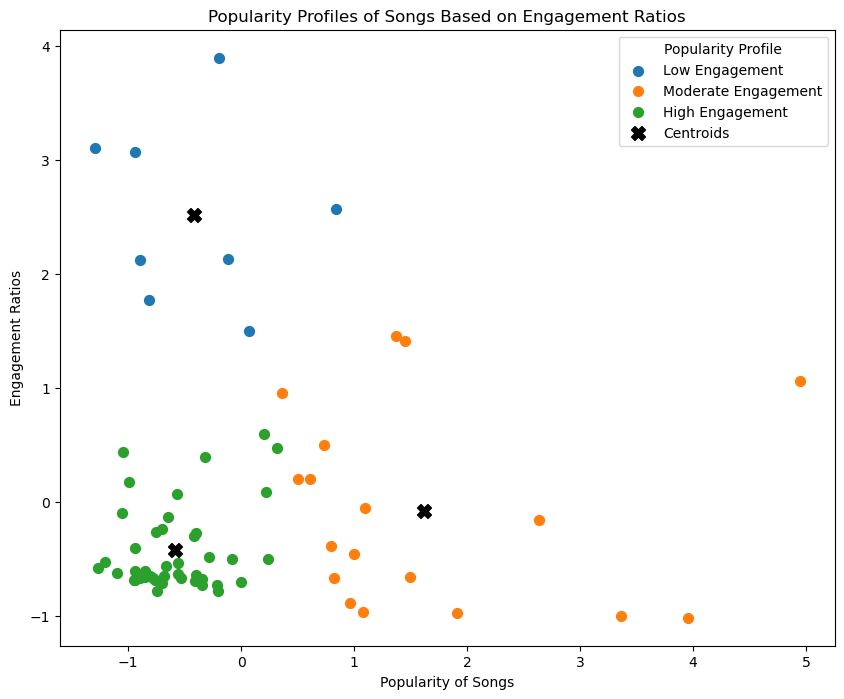

In [21]:
# Calc Engagement Ratios
lyrics_df['likes_per_view'] = lyrics_df['likes'] / lyrics_df['views']
lyrics_df['comments_per_view'] = lyrics_df['comments'] / lyrics_df['views']

# Replace NaN or infinite values with 0 - emp
lyrics_df[['likes_per_view', 'comments_per_view']] = lyrics_df[['likes_per_view', 'comments_per_view']].fillna(0)

# Standardize the features
features = lyrics_df[['likes_per_view', 'comments_per_view', 'popularity']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Find the optimal number of clusters using elbow method
inertia = []
n_clusters_range = range(1, 11)
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot elbow curve to pick the best cluster count
plt.figure(figsize=(8, 6))
plt.plot(n_clusters_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters (Engagement Ratios)')
plt.show()

# Choose 3 clusters
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
lyrics_df['popularity_profile'] = kmeans.fit_predict(scaled_features)

# Name clusters
profile_names = {0: "Low Engagement", 1: "Moderate Engagement", 2: "High Engagement"}
lyrics_df['popularity_profile'] = lyrics_df['popularity_profile'].map(profile_names)

# Show the average characteristics for each cluster
cluster_summary = lyrics_df.groupby('popularity_profile')[['likes_per_view', 'comments_per_view', 'popularity']].mean()
print(cluster_summary)

# Use PCA to get to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Plot each cluster and add centroids for reference
plt.figure(figsize=(10, 8))
for profile_name in profile_names.values():
    cluster_mask = lyrics_df['popularity_profile'] == profile_name
    plt.scatter(pca_features[cluster_mask, 0],
                pca_features[cluster_mask, 1],
                label=profile_name, s=50)

# Show center of each cluster in PCA-reduced space
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', label='Centroids', marker='X')

plt.xlabel("Popularity of Songs")
plt.ylabel("Engagement Ratios")
plt.title("Popularity Profiles of Songs Based on Engagement Ratios")
plt.legend(title="Popularity Profile")
plt.show()


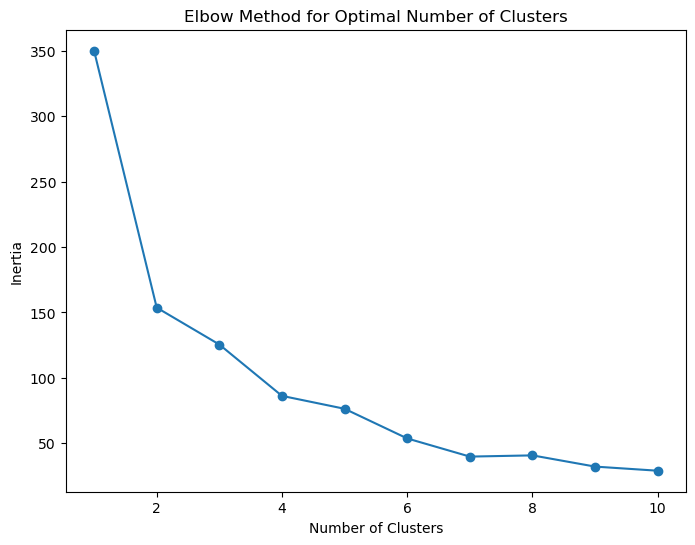

                            views         likes      comments    popularity  \
popularity_profile                                                            
High Engagement      4.202841e+08  6.479045e+06  1.205261e+06  2.123268e+08   
Low Engagement       7.267633e+08  1.760772e+07  2.801961e+06  3.692244e+08   
Moderate Engagement  3.774802e+07  9.082256e+05  1.048415e+05  1.916744e+07   

                     polarity  
popularity_profile             
High Engagement      0.164966  
Low Engagement       0.579041  
Moderate Engagement  0.164000  


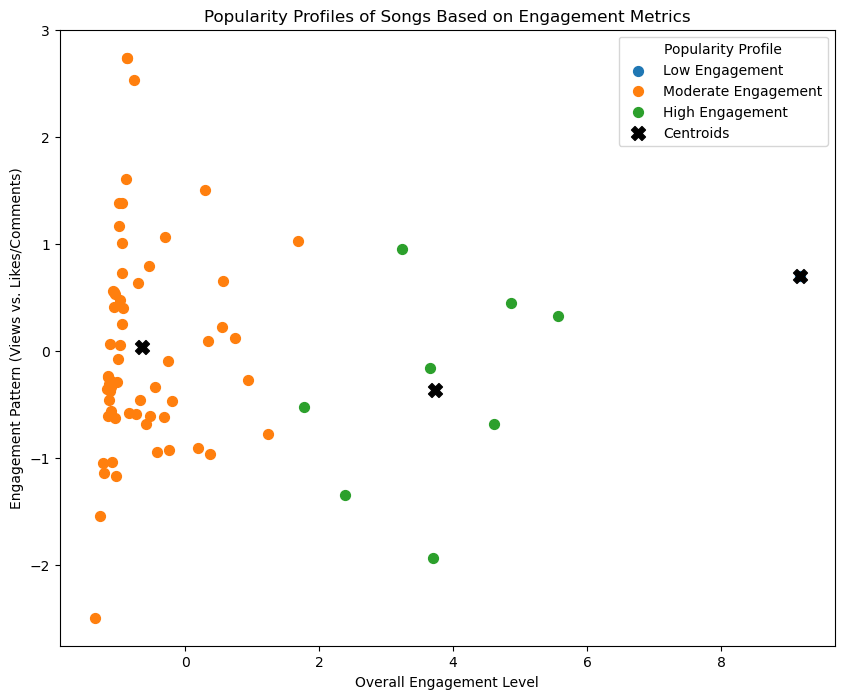

In [22]:
# Standardize the features
features = lyrics_df[['views', 'likes', 'comments', 'popularity', 'polarity']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Find the optimal number of clusters using the elbow method
# https://www.w3schools.com/python/python_ml_k-means.asp
inertia = []
n_clusters_range = range(1, 11)
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve to visually pick the best cluster count
plt.figure(figsize = (8, 6))
plt.plot(n_clusters_range, inertia, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Choose 3 clusters based on the elbow method 
# this is where inertia levels off
n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
lyrics_df['popularity_profile'] = kmeans.fit_predict(scaled_features)

# Name clusters
profile_names = {0: "Low Engagement", 1: "Moderate Engagement", 2: "High Engagement"}
lyrics_df['popularity_profile'] = lyrics_df['popularity_profile'].map(profile_names)

# Show the average characteristics for each cluster
cluster_summary = lyrics_df.groupby('popularity_profile')[['views', 'likes', 'comments', 'popularity', 'polarity']].mean()
print(cluster_summary)

# Use PCA to reduce to 2 dimensions, better rep of clusters
pca = PCA(n_components = 3)
pca_features = pca.fit_transform(scaled_features)

# Plot each cluster and add centroids for reference
plt.figure(figsize = (10, 8))
for profile_name in profile_names.values():
    cluster_mask = lyrics_df['popularity_profile'] == profile_name
    plt.scatter(pca_features[cluster_mask, 0],
                pca_features[cluster_mask, 1],
                label=profile_name, s = 50)

# Show the center of each cluster in PCA-reduced space for clarity
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s = 100, c = 'black', label = 'Centroids', marker ='X')

plt.xlabel("Overall Engagement Level")
plt.ylabel("Engagement Pattern (Views vs. Likes/Comments and Polarity)")
plt.title("Popularity Profiles of Songs Based on Engagement Metrics")
plt.legend(title = "Popularity Profile")
plt.show()


This clustering analysis categorized songs into three distinct "popularity profiles" based on views, likes, comments, and other popularity metrics: Low Engagement, Moderate Engagement, and High Engagement. The elbow method determined that three clusters are optimal for this analysis.

The summary table presents the average engagement for each profile, revealing that High Engagement songs have the highest values across all metrics. Additionally, a PCA plot visualizes these profiles in two dimensions, with black "X" markers indicating the centroids of each cluster. The plot clearly distinguishes among the profiles, demonstrating varying levels of audience interaction.

These profiles can be utilized to predict engagement patterns for new songs and inform marketing strategies tailored to each profile's level of engagement.